In [1]:
import numpy as np

### Import Signal and Array

`signal.py` defines some commonly used signal types in DOA estimation. Each signal type is a class that inherits from the base class `Signal`. These classes are used to generate incident signals.  
`array.py` defines some commonly used array structures. Each array structure is a class that inherits from the base class `Array`. The `Array` class uses the signals generated by the `Signal` class and the incident angles to generate simulated data for the received signals of the array.

The mathematical model for the received signals of the array (narrowband signals) is given by: $$\bf{X} = \bf{A} \bf{S}$$

where: $$\bf{X} = \begin{bmatrix} x_1(t) & x_2(t) & \dots & x_M(t) \end{bmatrix}^T$$ is an $M\times 1$ dimensional vector representing the received signals of the array.

$\bf{A} = \begin{bmatrix} \bf{a}(\theta_1) & \bf{a}(\theta_2) & \dots & \bf{a}(\theta_N) \end{bmatrix}$ is an $M \times N$ dimensional matrix representing the manifold matrix of the array.

$\bf{a}(\theta_n) =\begin{bmatrix} e^{-j \omega_0 \tau_{1n}} & e^{-j \omega_0 \tau_{2n}} \dots & e^{-j \omega_0 \tau_{Mn}} \end{bmatrix}^T$ is the steering vector corresponding to the incident angle.

$\bf{X} = \begin{bmatrix} s_1(t) & s_2(t) & \dots & s_N(t) \end{bmatrix}^T$ is an $N\times 1$ dimensional vector representing the incident signals.


In [2]:
from classical_doa.arrays import UniformLinearArray
from classical_doa.signals import ComplexStochasticSignal

### Simulation Parameter Configuration

Define simulation parameters related to array structure, signal parameters, and incident direction to generate sampled array received signals.


In [4]:
# signal parameters
num_snapshots = 300
signal_fre = 2e7
fs = 5e7
snr = 0

# array parameters
num_antennas = 8
antenna_spacing = 0.5 * (
    3e8 / signal_fre
)  # set array spacing to half wavelength

# incident angles
angle_incidence = np.array([0, 30, -60])
num_signal = len(angle_incidence)

### Simulation Signal Generation

Instantiate `Array` and `Signal` and generate simulated data of array received signals.


In [5]:
# initialize signal instance
signal = ComplexStochasticSignal(nsamples=num_snapshots, fre=signal_fre, fs=fs)

# initialize array instance
array = UniformLinearArray(m=num_antennas, dd=antenna_spacing)

# generate received data
received_data = array.received_signal(
    signal=signal, snr=snr, angle_incidence=angle_incidence, unit="deg"
)

### Incident Angle Estimation

Several classical DOA estimation algorithms are defined in the `algorithm` package, some of which will output the spatial spectrum, and some of which will directly output the estimated incident angle value.
So we first import two plotting functions, which are used to show the estimation results of these two algorithms.


In [6]:
from classical_doa.plot import plot_estimated_value, plot_spatial_spectrum

#### MUSIC Algorithm


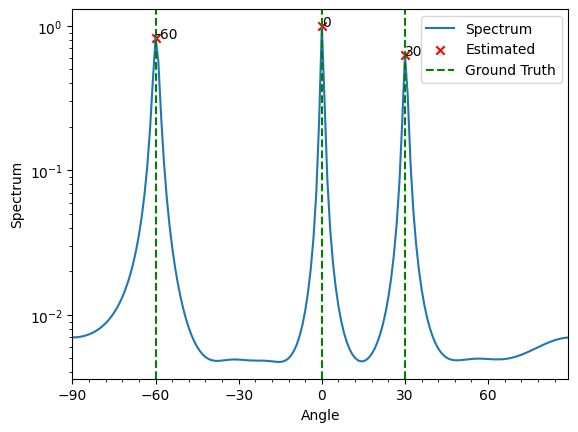

In [7]:
search_grids = np.arange(-90, 90, 1)

from classical_doa.algorithm import music

music_spectrum = music(
    received_data=received_data,
    num_signal=num_signal,
    array=array,
    signal_fre=signal_fre,
    angle_grids=search_grids,
    unit="deg",
)

# plot spatial spectrum
plot_spatial_spectrum(
    spectrum=music_spectrum,
    angle_grids=search_grids,
    ground_truth=angle_incidence,
    num_signal=num_signal,
)

#### Root-MUSIC Algorithm


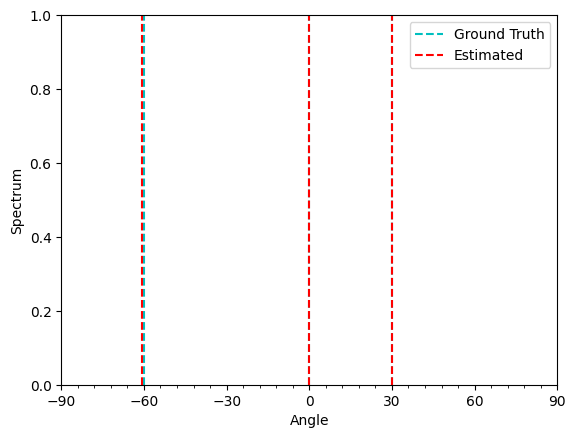

In [7]:
from classical_doa.algorithm import root_music

rmusic_estimates = root_music(
    received_data=received_data,
    num_signal=num_signal,
    array=array,
    signal_fre=signal_fre,
    unit="deg",
)
plot_estimated_value(estimates=rmusic_estimates, ground_truth=angle_incidence)

#### ESPRIT Algorithm


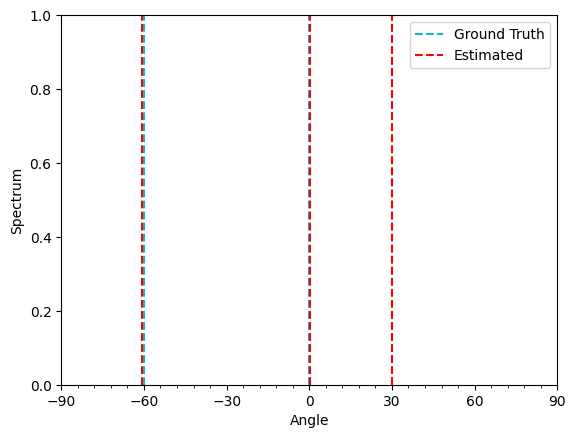

In [8]:
from classical_doa.algorithm import esprit

esprit_estimates = esprit(
    received_data=received_data,
    num_signal=num_signal,
    array=array,
    signal_fre=signal_fre,
)

plot_estimated_value(estimates=esprit_estimates, ground_truth=angle_incidence)

#### OMP Algorithm


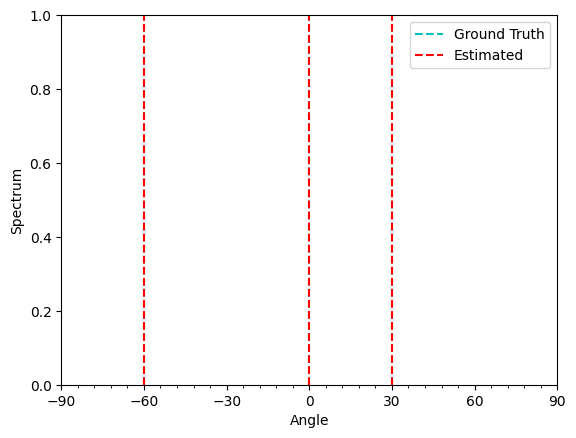

In [9]:
from classical_doa.algorithm import omp

omp_estimates = omp(
    received_data=received_data,
    num_signal=num_signal,
    array=array,
    signal_fre=signal_fre,
    angle_grids=search_grids,
    unit="deg",
)

plot_estimated_value(estimates=omp_estimates, ground_truth=angle_incidence)

#### L1_SVD Algorithm


d:\Documents\Codes\Python\classical_doa\.venv\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


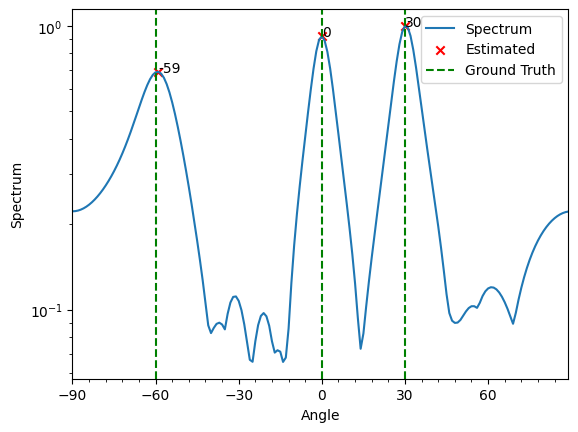

In [8]:
from classical_doa.algorithm import l1_svd

l1_svd_spectrum = l1_svd(
    received_data=received_data,
    num_signal=num_signal,
    array=array,
    signal_fre=signal_fre,
    angle_grids=search_grids,
    unit="deg",
)

plot_spatial_spectrum(
    spectrum=l1_svd_spectrum,
    angle_grids=search_grids,
    ground_truth=angle_incidence,
    num_signal=num_signal,
)
